<a href="https://colab.research.google.com/github/ytyfeng/data-analysis/blob/master/bil151_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import matplotlib
%matplotlib inline

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt
from google.colab import files

In [20]:
uploaded = files.upload() # upload your table 1 data as a .csv file named bil151.csv here 

Saving bil151.csv to bil151 (1).csv


In [21]:
import io
data = pd.read_csv(io.BytesIO(uploaded['bil151.csv'])) # Make sure the filename you uploaded is bil151.csv!
data # prints the data

,Sample #,Mtreatment,Mcontrol,ProphaseTreatment,ProphaseControl,MetaphaseTreatment,MetaphaseControl,Anaphase Treatment,Anaphase Control,TelophaseTreatment,TelophaseControl
0,1,0.376368,0.752155,0.610465,0.200573,0.279070,0.014327,0.000000,0.062500,0.052326,0.097421
1,2,0.516279,0.861878,0.918919,0.252137,0.030534,0.053419,0.006826,0.067568,0.027027,0.134615
2,3,0.308235,0.669767,0.931298,0.625000,0.027027,0.069444,0.010000,0.320132,0.022901,0.243056
3,4,0.354167,0.755102,0.757353,0.278378,0.169118,0.110811,0.012048,0.325342,0.044118,0.124324
4,5,0.512821,0.802296,0.990000,0.341812,0.000000,0.036566,0.027027,0.325914,0.000000,0.295707
5,6,0.405256,0.643478,0.904437,0.128378,0.020478,0.074324,0.027027,0.486486,0.068259,0.729730
6,7,0.512979,0.675926,0.951807,0.277397,0.021687,0.119863,0.029412,0.559829,0.014458,0.277397
7,8,0.395802,0.653017,0.958333,0.303630,0.015152,0.122112,0.058140,0.687679,0.026515,0.254125


In [22]:
data.describe()

,Sample #,Mtreatment,Mcontrol,ProphaseTreatment,ProphaseControl,MetaphaseTreatment,MetaphaseControl,Anaphase Treatment,Anaphase Control,TelophaseTreatment,TelophaseControl
count,8.00000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000
mean,4.50000,0.422738,0.726703,0.877827,0.300913,0.070383,0.075108,0.021310,0.354431,0.031950,0.269547
std,2.44949,0.081067,0.078937,0.128613,0.146380,0.099737,0.039947,0.018381,0.220723,0.021857,0.200847
min,1.00000,0.308235,0.643478,0.610465,0.128378,0.000000,0.014327,0.000000,0.062500,0.000000,0.097421
25%,2.75000,0.370817,0.665580,0.867666,0.239246,0.019146,0.049206,0.009206,0.256991,0.020790,0.132043
50%,4.50000,0.400529,0.714041,0.925108,0.277888,0.024357,0.071884,0.019538,0.325628,0.026771,0.248590
75%,6.25000,0.512860,0.766901,0.953439,0.313176,0.065180,0.113074,0.027623,0.504822,0.046170,0.281975
max,8.00000,0.516279,0.861878,0.990000,0.625000,0.279070,0.122112,0.058140,0.687679,0.068259,0.729730


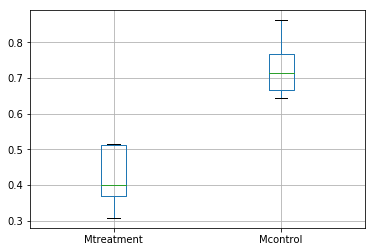

In [23]:
df1 = pd.DataFrame(data, columns=['Mtreatment',	'Mcontrol']) # You can create a dataframe by specifying the columns you want 
df1.boxplot()

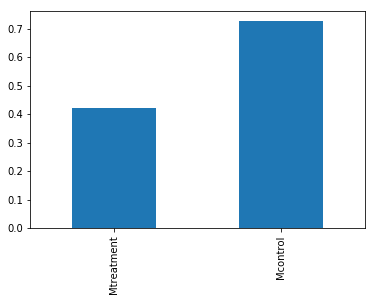

In [24]:
df1 = df1.mean()
df1.plot.bar()

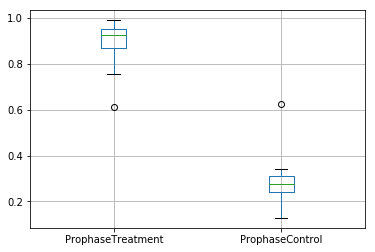

In [25]:
df2 = pd.DataFrame(data, columns=['ProphaseTreatment',	'ProphaseControl'])
df2.boxplot()

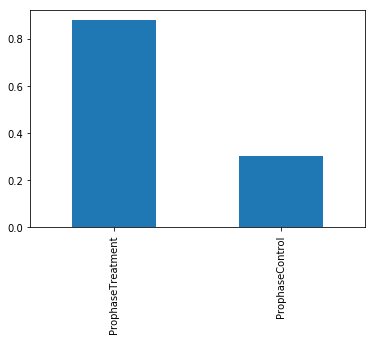

In [26]:
df2 = df2.mean()
df2.plot.bar()

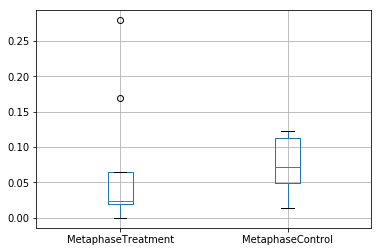

In [27]:
df3 = pd.DataFrame(data, columns=['MetaphaseTreatment',	'MetaphaseControl'])
df3.boxplot()

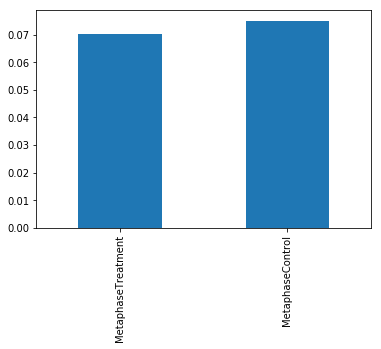

In [28]:
df3 = df3.mean()
df3.plot.bar()

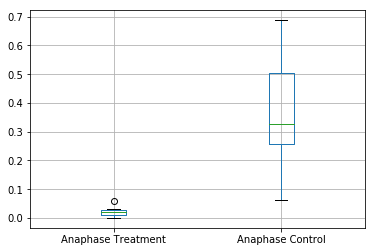

In [29]:
df4 = pd.DataFrame(data, columns=['Anaphase Treatment','Anaphase Control'])
df4.boxplot()

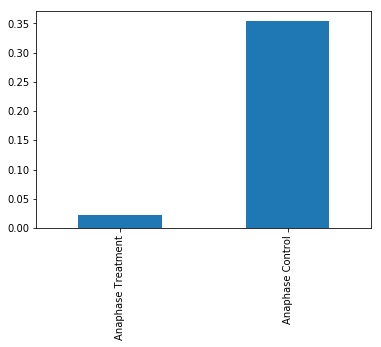

In [30]:
df4 = df4.mean()
df4.plot.bar()

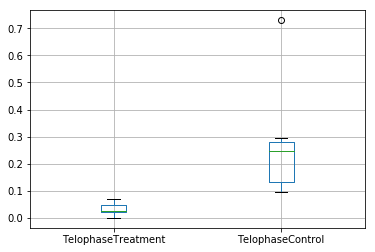

In [31]:
df5 = pd.DataFrame(data, columns=['TelophaseTreatment','TelophaseControl'])
df5.boxplot()

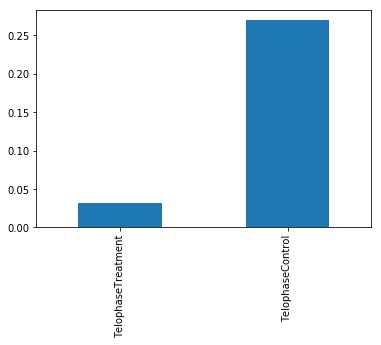

In [32]:
df5 = df5.mean()
df5.plot.bar()